In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt


In [3]:
def sense(x, y, theta, phi):
    N_particles = len(x)
    right = False
    left = False
    middle = False

    for i in range(N_particles):
        


SyntaxError: incomplete input (2056187908.py, line 8)

In [3]:
def deposit(x, y, trailmap):
    for i in range(len(x)):
        trailmap[x[i], y[i]] = 1
    return trailmap


In [26]:
def diffuse(trailmap):
    n, m = trailmap.shape
    for i in range(int(np.floor(n/3))):
        for j in range(int(np.floor(m/3))):
            k = i*3-1
            l = j*3-1
            
            
            trailmap[k-1:k+2, l-1:l+2] = np.mean(trailmap[k-1:k+2, l-1:l+2])
    return trailmap
            


In [15]:
def decay(trailmap):
    trailmap = trailmap*0.95

    return trailmap

In [11]:
a = [0,1,2,3,4,5,6,7,8,9]

print(a[5-1:5+1])

[4, 5]


In [38]:
N_part = 1  # Number of particles.
L = 100  # Dimension of the squared arena.

v = 1  # Speed.
#Rf = 3  # Flocking radius.
#eta = 0.1  # Noise.  Try values: 0.01, 0.3, 1.0, 2 * np.pi
dt = 1  # Time step.


# Initialization.

# Random position.
x = np.random.randint(0, L, N_part) 
y = np.random.randint(0, L, N_part)  

# Random orientation.
theta = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]


trailmap = np.zeros([L,L])

21 84
21 83
21 82
21 81
21 80
21 79
21 78
21 77
21 76
21 75
21 74
21 73
21 72
21 71
21 70
21 69
21 68
21 67
21 66
21 65
21 64
21 63
21 62
21 61
21 60
21 59
21 58
21 57
21 56
21 55
21 54
21 53
21 52
21 51
21 50
21 49
21 48
21 47
21 46
21 45
21 44
21 43
21 42
21 41
21 40
21 39
21 38
21 37
21 36
21 35


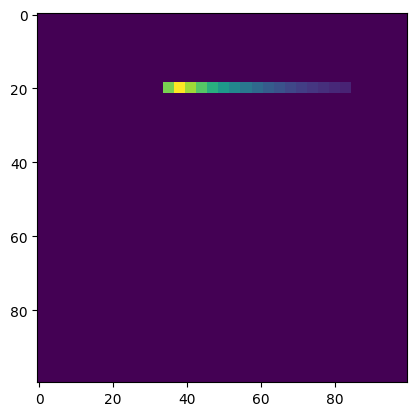

In [39]:
import time
from scipy.constants import Boltzmann as kB 
from tkinter import *

window_size = 600

rp = 0.5  # Plotting radius of a particle.
vp = 1  # Length of the arrow indicating the velocity direction.
line_width = 1  # Width of the arrow line.

N_skip = 1

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window 
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

particles = []
for j in range(N_part):
    particles.append(
        canvas.create_oval(
            (x[j] - rp) / L * window_size, 
            (y[j] - rp) / L * window_size,
            (x[j] + rp) / L * window_size, 
            (y[j] + rp) / L * window_size,
            outline='#FF0000', 
            fill='#FF0000',
        )
    )

velocities = []
for j in range(N_part):
    velocities.append(
        canvas.create_line(
            x[j] / L * window_size, 
            y[j] / L * window_size,
            (x[j] + vp * np.cos(theta[j])) / L * window_size, 
            (y[j] + vp * np.cos(theta[j])) / L * window_size,
            width=line_width
        )
    )

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:
    
    # Calculate next theta from the rule.
    #dtheta = eta * (np.random.rand(N_part) - 0.5) * dt
    #ntheta = interaction(x, y, theta, Rf, L) + dtheta
    nx = x + np.round(v * np.cos(theta))
    ny = y + np.round(v * np.sin(theta))
    
    nvx = np.round(v * np.cos(theta))
    nvy = np.round(v * np.sin(theta))


    ntheta = theta
    # Reflecting boundary conditions.
    #nx, ny = pbc(nx, ny, L)
        
    # Update animation frame.
    if step % N_skip == 0:        
        for j, particle in enumerate(particles):
            canvas.coords(
                particle,
                (nx[j] - rp) / L * window_size,
                (ny[j] - rp) / L * window_size ,
                (nx[j] + rp) / L * window_size ,
                (ny[j] + rp) / L * window_size ,
            )
                    
        for j, velocity in enumerate(velocities):
            canvas.coords(
                velocity,
                nx[j] / L * window_size,
                ny[j] / L * window_size,
                (nx[j] + vp * np.cos(theta[j])) / L * window_size,
                (ny[j] + vp * np.sin(theta[j])) / L * window_size,
            )
                    
        tk.title(f'Time {step * dt:.1f} - Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(0.01)  # Increase to slow down the simulation.    


    # Reflecting boundary conditions.
    for j in range(N_part):
        if nx[j] < 0:
            nx[j] = 0 + (0 - nx[j])
            nvx[j] = - nvx[j]

        if nx[j] > L-1:
            nx[j] = L-1 - (nx[j] - L+1)
            nvx[j] = - nvx[j]

        if ny[j] < 0:
            ny[j] = 0 + (0 - ny[j])
            nvy[j] = - nvy[j]
            
        if ny[j] > L-1:
            ny[j] = L-1 - (ny[j] - L+1)
            nvy[j] = - nvy[j]
    
    nv = np.sqrt(nvx ** 2 + nvy ** 2)
    for i in range(N_part):
        ntheta[i] = math.atan2(nvy[i], nvx[i])


    step += 1
    
    x[:] = nx[:]
    y[:] = ny[:]
    theta[:] = ntheta[:]  

    trailmap = deposit(x, y, trailmap)
    trailmap = diffuse(trailmap)
    trailmap = decay(trailmap)
    print(x[0], y[0])
    if step == 50:
        running = False

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).
plt.imshow(trailmap)